<a href="https://colab.research.google.com/github/Praneetb2929/AiMl-ElevateLab-1/blob/main/Task_6__K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the dataset & explore it**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print(X.head())
print(X.describe())
print(X.isnull().sum())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

# **Normalize the features**

In [ ]:
# (KNN depends on distance → scaling is important)

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Train-test split**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# **Train KNN with different values of K**

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    print(f"K={k}, Accuracy={accuracy_score(y_test, preds):.3f}")

K=1, Accuracy=0.967
K=2, Accuracy=1.000
K=3, Accuracy=1.000
K=4, Accuracy=1.000
K=5, Accuracy=1.000
K=6, Accuracy=1.000
K=7, Accuracy=1.000
K=8, Accuracy=1.000
K=9, Accuracy=1.000
K=10, Accuracy=1.000


# **Evaluate the best model**

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Visualize decision boundaries**

In [10]:
# (We take only 2 features for plotting)

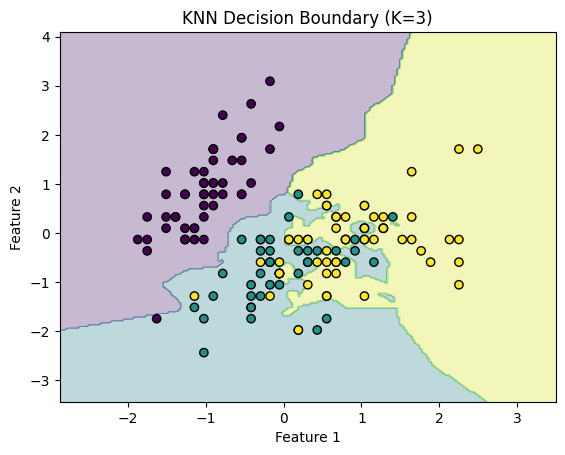

In [9]:
import matplotlib.pyplot as plt
import numpy as np

X_plot = X_scaled[:, :2]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_plot, y)

# Plot mesh grid
x_min, x_max = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
y_min, y_max = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary (K=3)")
plt.show()
